In [6]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import warnings
import seaborn as sns; 
sns.set(style="ticks", color_codes=True)
warnings.simplefilter(action = "ignore", category = FutureWarning)

%matplotlib inline

df = pd.read_csv('data/housing.data.csv')
df.corr()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.468536


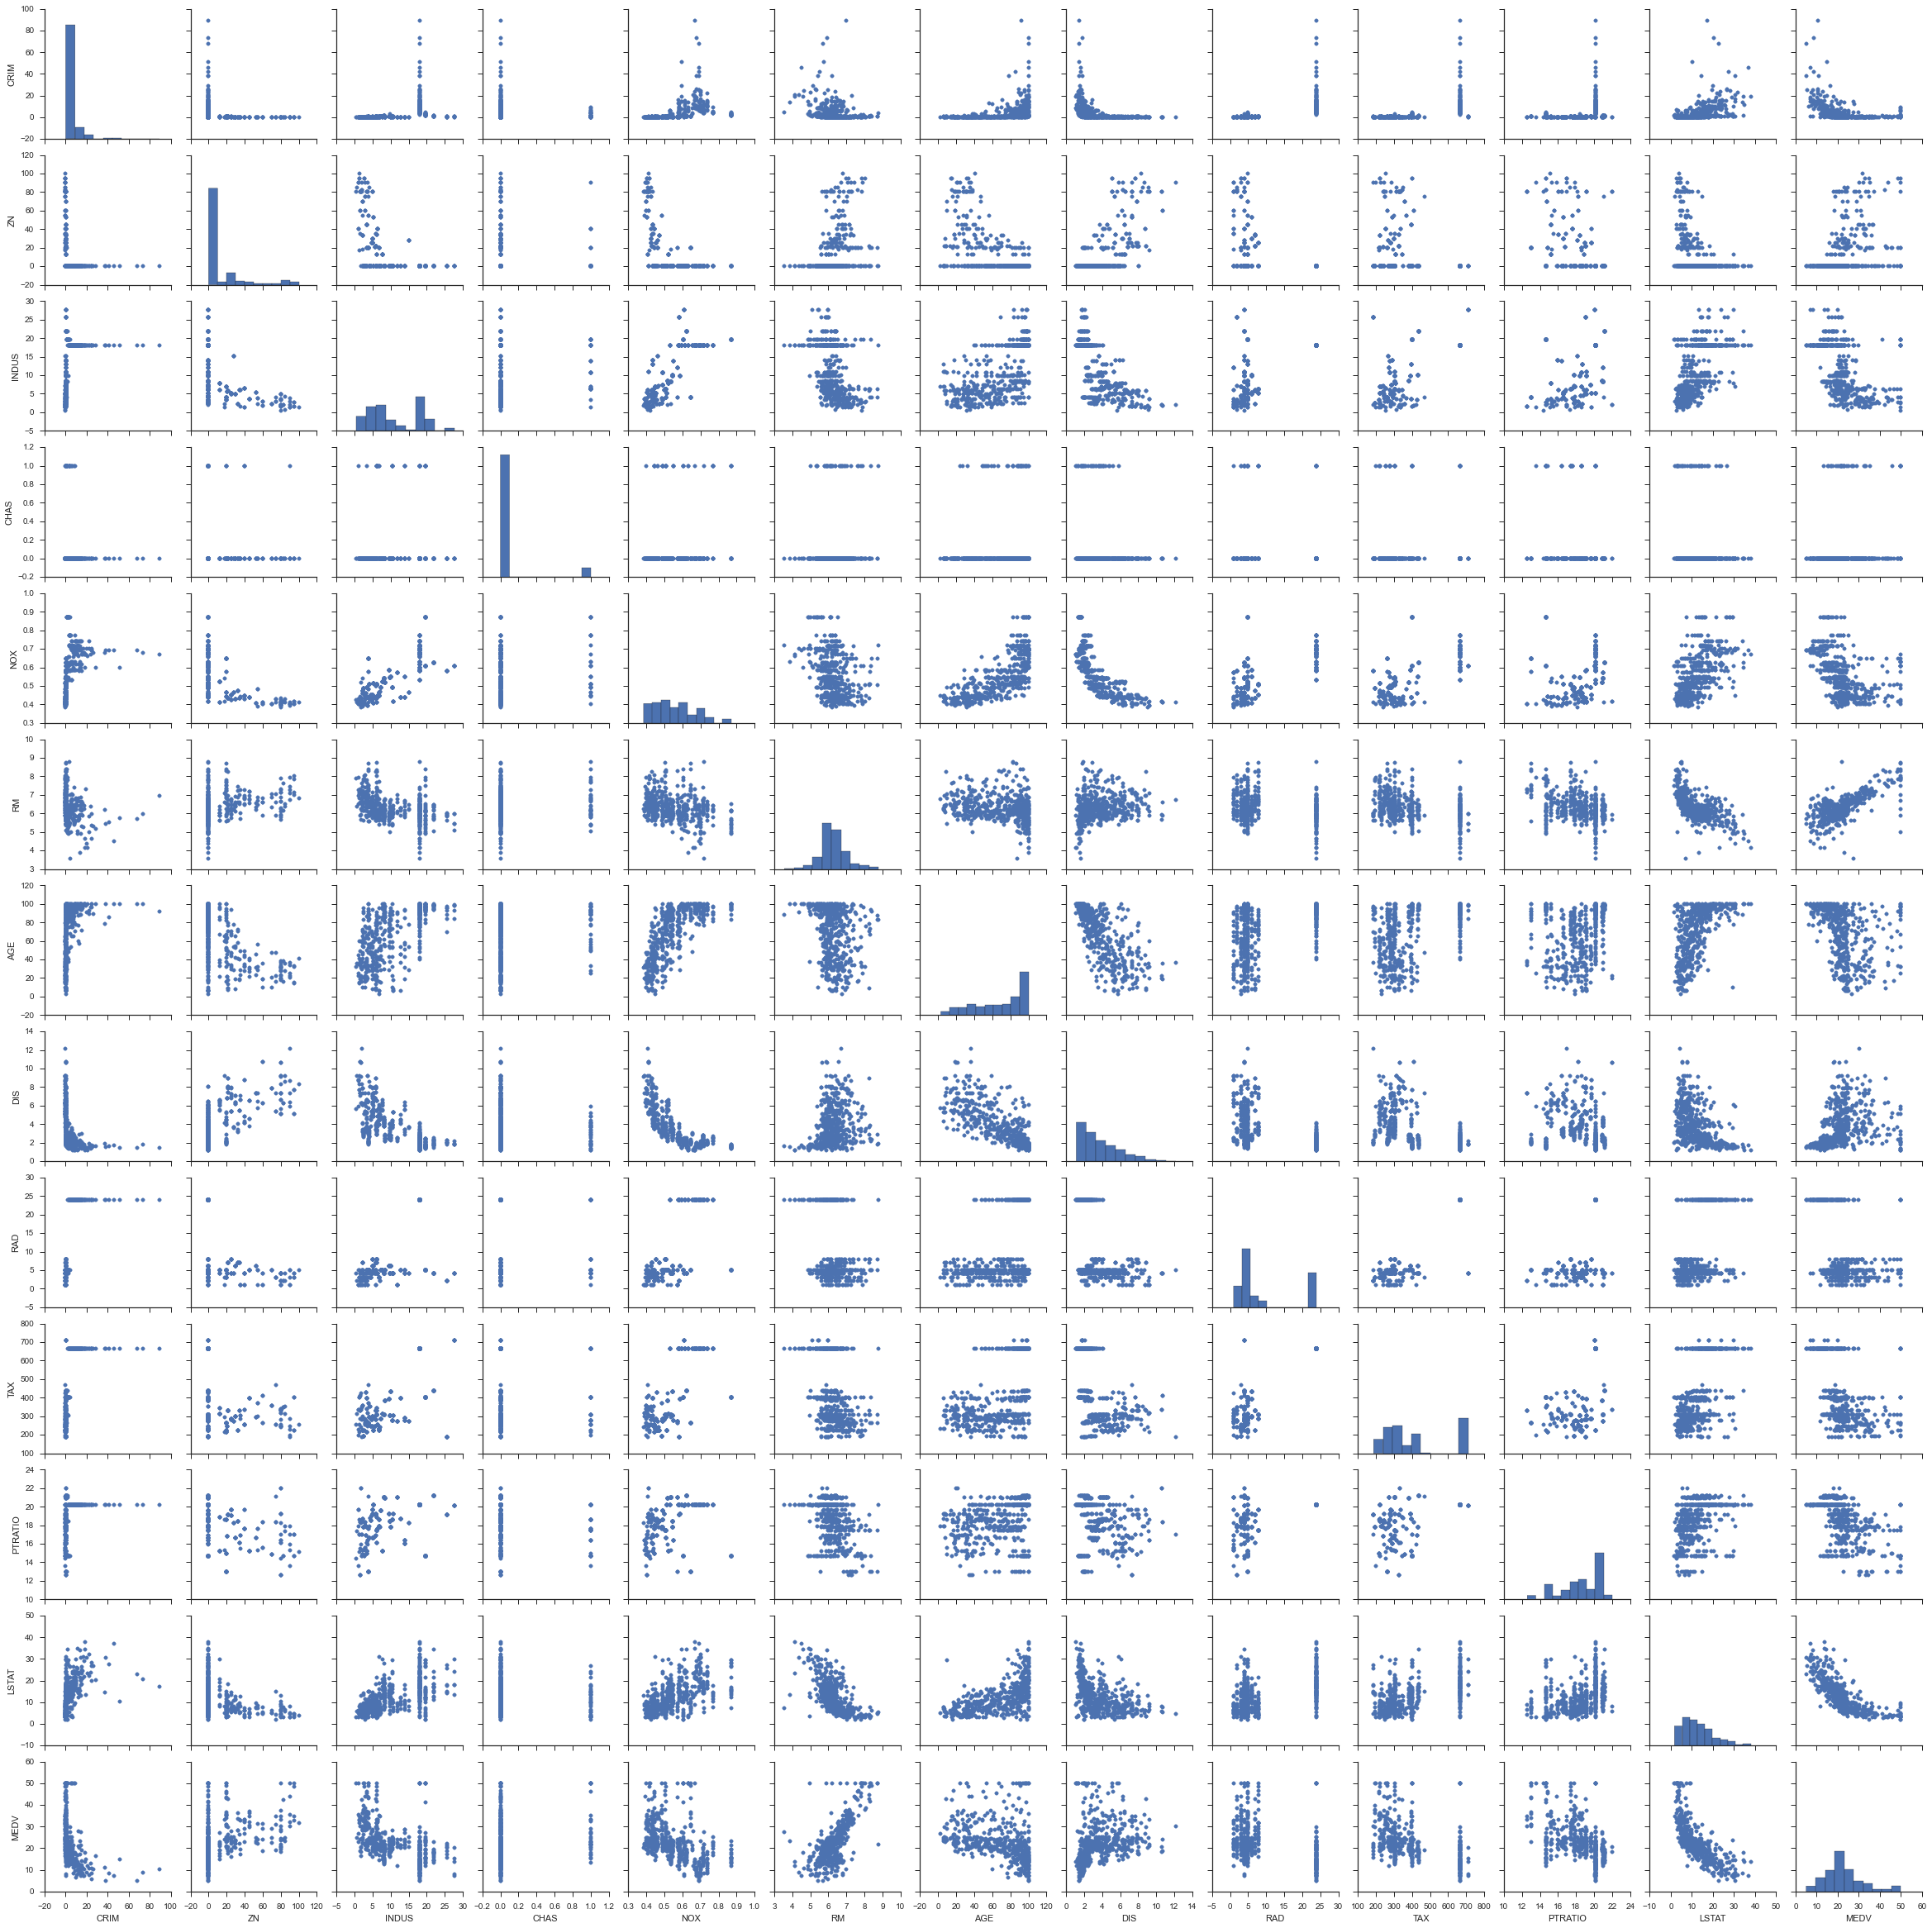

In [7]:
g = sns.pairplot(df)

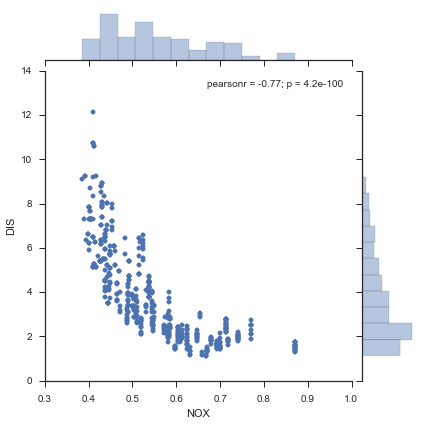

In [8]:
sns.jointplot(df.NOX, df.DIS)

(406, 13)
2.12697796424
1.11748693677
0.884117140766


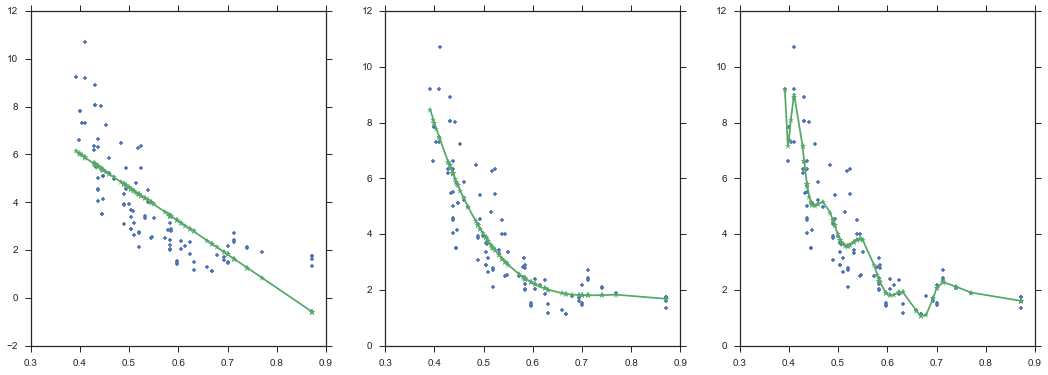

In [49]:
from sklearn.metrics import mean_squared_error

np.random.seed(0)

df = pd.read_csv('data/housing.data.csv')

df = df.iloc[np.random.permutation(len(df))]
df.reset_index(drop=True)

df_test = df[100:]
df = df[:100]


df.sort_values(by = 'NOX', inplace = True)

print(df_test.shape)
X = df.NOX.reshape(-1,1)
y = df.DIS

clf = linear_model.LinearRegression()
clf.fit(X, y)
y_hat = clf.predict(X)

fig, [ax1, ax2, ax3] = plt.subplots(1,3,figsize=(18,6))
ax1.plot(X, y, '.')
ax1.plot(X, y_hat, marker='*', c ='r')
print(mean_squared_error(y, y_hat) )

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(4)
X4 = poly.fit_transform(X)

clf = linear_model.LinearRegression()
clf.fit(X4, y)
y_hat4 = clf.predict(X4)

ax2.plot(X, y, '.')
ax2.plot(X, y_hat4, marker='*', c ='r')
print(mean_squared_error(y, y_hat4) )

# 

poly = PolynomialFeatures(16)
XX = poly.fit_transform(X)

clf = linear_model.LinearRegression()
clf.fit(XX, y)
yy_hat = clf.predict(XX)

ax3.plot(X, y, '.')
ax3.plot(X, yy_hat, marker='*', c ='r')
print(mean_squared_error(y, yy_hat) )



In [48]:
df = df[:100]
df.shape

df2 = df[50:100]
df2.shape

(50, 13)

In [65]:
np.random.seed(0)

df = pd.read_csv('data/housing.data.csv')
df.columns

X = df[ ['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT'] ].values
y = df['MEDV']

clf = linear_model.LinearRegression()
clf.fit(X, y)
yy_hat = clf.predict(X)
print(mean_squared_error(y, yy_hat) )


clf = linear_model.Ridge(alpha = 1,  normalize=False)
clf.fit(X, y)
yy_hat = clf.predict(X)
print(mean_squared_error(y, yy_hat) )




23.4510961138
23.6186187028


In [63]:
?linear_model.Ridge()